In [1]:
%load_ext autoreload
%autoreload 2

from wfa.ml_logic.model import predict_new_images 
from wfa.utils.image_viz import plot_classified_images
from wfa.utils.get_new_images import get_new_image, split_tiles
from tensorflow.keras import models
from wfa.ml_logic import registry

2022-12-09 09:04:07.564017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 09:04:07.749156: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 09:04:07.749216: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 09:04:09.016569: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
adr = '-5.426572, -65.833927'
year1 = '2018' 
year2 = '2020'

In [3]:
new_img1 = get_new_image(adr, year1)
new_img2 = get_new_image(adr, year2)

In [4]:
loaded_model = models.load_model('../models/my_model');

2022-12-09 09:04:17.472740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-09 09:04:17.472796: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-09 09:04:17.472826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (schneider-1091-luis-roberto-sant-anna-henriques): /proc/driver/nvidia/version does not exist
2022-12-09 09:04:17.473121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
X_test1 = split_tiles(new_img1)
X_test2 = split_tiles(new_img2)

In [6]:
cat_pred1 = predict_new_images(loaded_model, X_test1);
cat_pred2 = predict_new_images(loaded_model, X_test2);

4/4 [==============================] - 0s 23ms/step


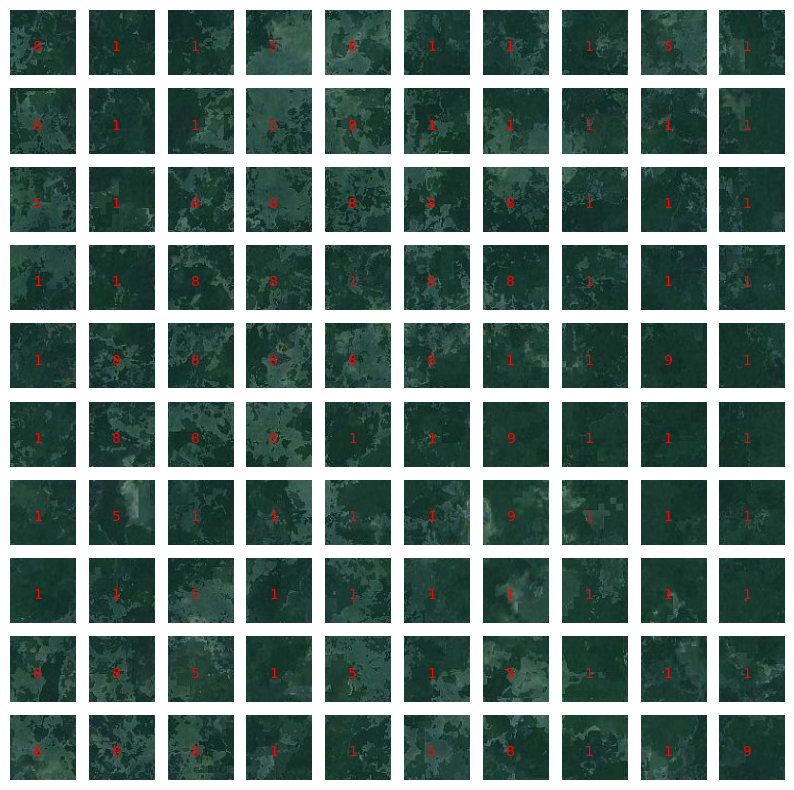

In [7]:
plot_classified_images(X_test1, cat_pred1)

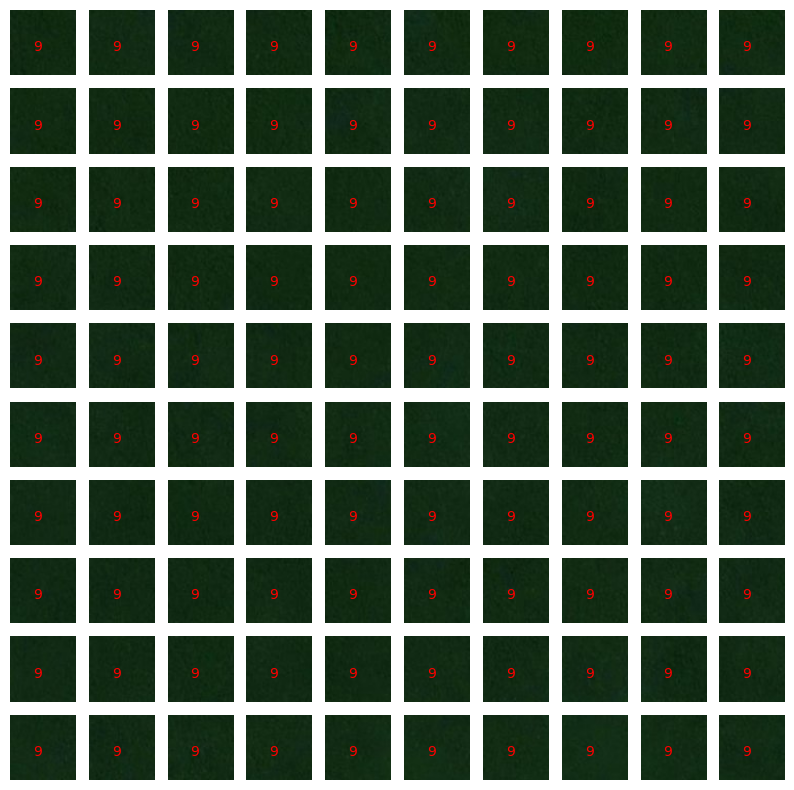

In [8]:
plot_classified_images(X_test2, cat_pred2)

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [10]:
LOCAL_REGISTRY_PATH = os.environ.get("MODEL_TARGET")
LOCAL_REGISTRY_PATH == None

False

In [11]:
registry.save_model(loaded_model)

INFO:tensorflow:Assets written to: /tmp/tmp5w6wwi03/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp5w6wwi03/model/data/model/assets
/home/luis.robertosantannahenriques/.pyenv/versions/3.10.6/envs/watching-from-above/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'luis' already exists. Creating a new version of this model...
2022/12/09 09:04:40 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: luis, version 3
Created version '3' of model 'luis'.


In [12]:
new_model = registry.load_model()


Load model Production stage from mlflow...


In [13]:
cat_pred1 = predict_new_images(new_model, X_test1);
cat_pred2 = predict_new_images(new_model, X_test2);

4/4 [==============================] - 0s 28ms/step


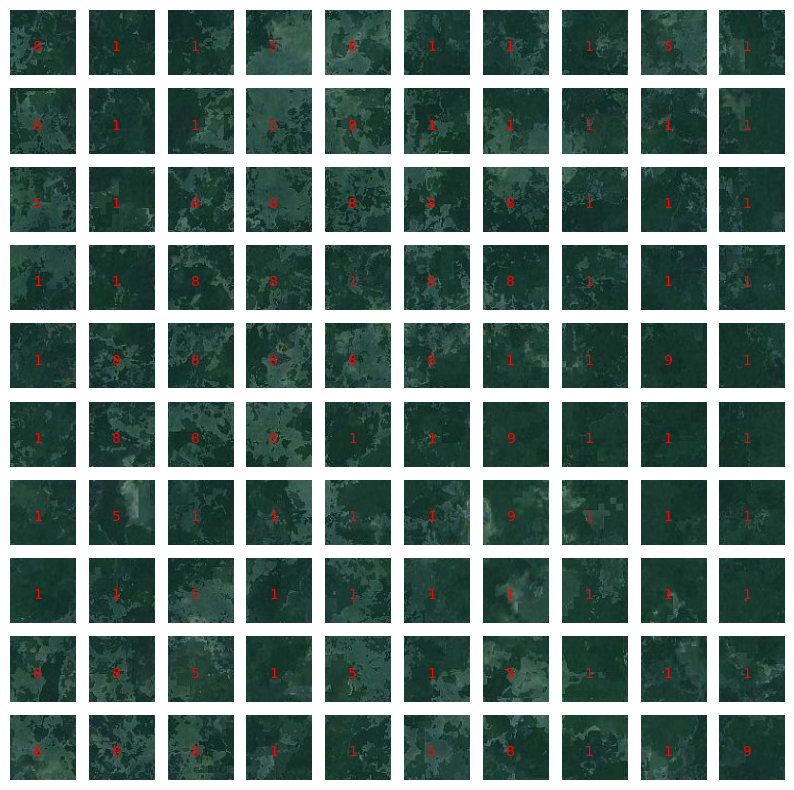

In [14]:
plot_classified_images(X_test1, cat_pred1)